In [1]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import f_classif 
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модел
import seaborn as sns

In [64]:
url
hotels = pd.read_csv('data/hotels.csv') #
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386802 entries, 0 to 386801
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386802 non-null  object 
 1   additional_number_of_scoring                386802 non-null  int64  
 2   review_date                                 386802 non-null  object 
 3   average_score                               386802 non-null  float64
 4   hotel_name                                  386802 non-null  object 
 5   reviewer_nationality                        386802 non-null  object 
 6   negative_review                             386802 non-null  object 
 7   review_total_negative_word_counts           386802 non-null  int64  
 8   total_number_of_reviews                     386802 non-null  int64  
 9   positive_review                             386802 non-null  object 
 

In [65]:
drop_list = ['hotel_address','hotel_name', 'reviewer_nationality', 'negative_review',' positive_review','days_since_review']
hotels = hotels.drop(columns=drop_list,axis=1)



In [66]:
hotels = hotels.fillna({'lat':hotels['lat'].mean(),'lng':hotels['lng'].mean()})
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386802 entries, 0 to 386801
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386802 non-null  int64  
 1   review_date                                 386802 non-null  object 
 2   average_score                               386802 non-null  float64
 3   review_total_negative_word_counts           386802 non-null  int64  
 4   total_number_of_reviews                     386802 non-null  int64  
 5   review_total_positive_word_counts           386802 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386802 non-null  int64  
 7   reviewer_score                              386802 non-null  float64
 8   tags                                        386802 non-null  object 
 9   lat                                         386802 non-null  float64
 

In [67]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',\
    'total_number_of_reviews_reviewer_has_given','additional_number_of_scoring']

# категориальные признаки
cat_cols = ['average_score','lat']

In [68]:
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<AxesSubplot:>

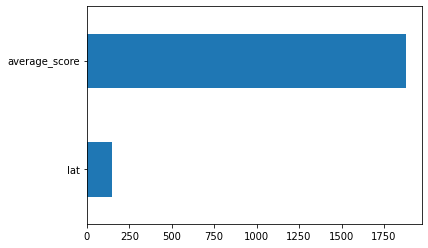

In [69]:
y=y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

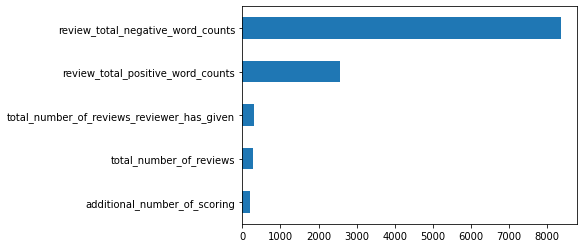

In [70]:
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<AxesSubplot:>

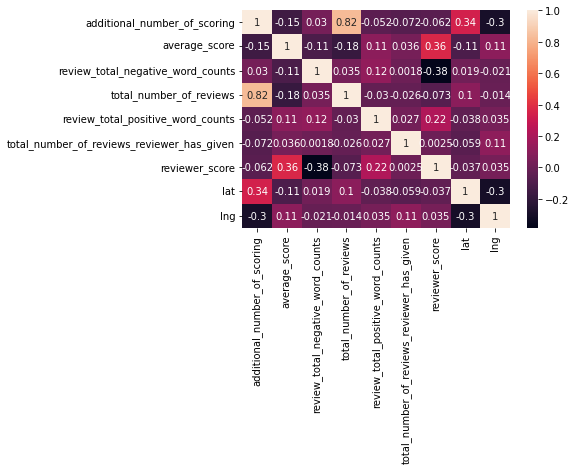

In [71]:
sns.heatmap(hotels.corr(), annot=True)

Появляются вопросы по поводу необходимости признака, показывающий кол-во отзывов
Однако этот признак нельхя ни в коем случае трогать, иначе мы ухудшим нашу модель

In [73]:
hotels['review_date'] = pd.to_datetime(hotels['review_date']) 
max(hotels['review_date']) #выводим дату с полсдеднего отзыва

Timestamp('2017-08-03 00:00:00')

In [74]:
def re_func(num_tags): #функция для сплита тэгов
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_new'] = hotels['tags'].apply(re_func) #создаём новый признак на основе предыдущего
hotels_day = hotels.explode('tags_new') 
hotels_day =hotels_day.drop('tags', axis=1) #удалфем ненужный признак
hotels_day

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,tags_new
0,581,2016-02-19,8.4,3,1994,4,7,10.0,51.507894,-0.143671,Leisure trip
0,581,2016-02-19,8.4,3,1994,4,7,10.0,51.507894,-0.143671,Couple
0,581,2016-02-19,8.4,3,1994,4,7,10.0,51.507894,-0.143671,Studio Suite
0,581,2016-02-19,8.4,3,1994,4,7,10.0,51.507894,-0.143671,Stayed 2 nights
0,581,2016-02-19,8.4,3,1994,4,7,10.0,51.507894,-0.143671,Submitted from a mobile device
...,...,...,...,...,...,...,...,...,...,...,...
386800,365,2017-05-21,8.1,0,1567,6,28,9.2,51.515125,-0.160066,Stayed 2 nights
386801,222,2016-08-05,9.0,20,1209,20,2,8.8,51.493109,-0.190208,Leisure trip
386801,222,2016-08-05,9.0,20,1209,20,2,8.8,51.493109,-0.190208,Couple
386801,222,2016-08-05,9.0,20,1209,20,2,8.8,51.493109,-0.190208,Bunk Bed Room


In [75]:

list_day = list()

hotels_day['days'] = hotels_day['tags_new'].apply(lambda x: int(x.split()[1]) if 'Stayed' in x else 0)

hotels_day = hotels_day.drop(['tags_new','review_date','additional_number_of_scoring'], axis = 1)
hotels_day['days'].value_counts()

0     1380861
1      145373
2      100263
3       71999
4       35748
5       15611
6        7399
7        5549
8        1910
9         966
10        663
11        306
12        217
14        184
13        174
15         87
16         38
17         27
18         24
19         23
21         19
20         17
27         10
30         10
22          8
28          7
26          6
23          6
24          5
25          4
29          3
Name: days, dtype: int64

<AxesSubplot:>

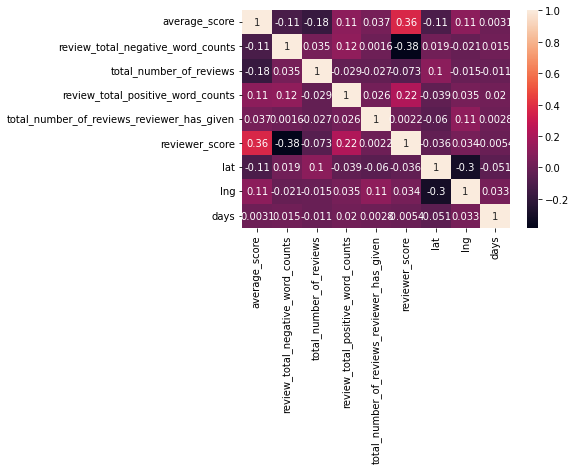

In [76]:
sns.heatmap(hotels_day.corr(), annot = True)
#Я хочу узнать, как дни вляют на прогноз. 


По данному графику видно что этот признак бесполезен для нас, и его можно смело удалять
(при обучении модели, прогнозы будут менее точны на 0.5%)

In [77]:
hotels_day = hotels_day.drop(['days'], axis = 1)

X = hotels_day.drop(['reviewer_score'], axis = 1)  
y = hotels_day['reviewer_score']
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y, test_size = 0.25, random_state = 42)


regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train_A, y_train_A)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred_A = regr.predict(X_test_A)  

In [79]:
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test_A, y_pred_A))


MAPE: 0.026053572482329704
